In [1]:
import os
print(os.getcwd())

C:\Users\DWWillson\Desktop\CAISO Monthly Prices


In [2]:
import pandas as pd
df= pd.read_csv('November_2018.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43250 entries, 0 to 43249
Data columns (total 16 columns):
INTERVALSTARTTIME_GMT    43250 non-null object
INTERVALENDTIME_GMT      43250 non-null object
OPR_DT                   43250 non-null object
OPR_HR                   43250 non-null int64
NODE_ID_XML              43250 non-null object
NODE_ID                  43250 non-null object
NODE                     43250 non-null object
MARKET_RUN_ID            43250 non-null object
LMP_TYPE                 43250 non-null object
XML_DATA_ITEM            43250 non-null object
PNODE_RESMRID            43250 non-null object
GRP_TYPE                 43250 non-null object
POS                      43250 non-null int64
VALUE                    43250 non-null float64
OPR_INTERVAL             43250 non-null int64
GROUP                    43250 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 5.3+ MB


In [4]:
df.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,VALUE,OPR_INTERVAL,GROUP
0,2018-11-01T07:00:00-00:00,2018-11-01T07:05:00-00:00,11/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,1,1
1,2018-11-01T07:05:00-00:00,2018-11-01T07:10:00-00:00,11/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,2,1
2,2018-11-01T07:10:00-00:00,2018-11-01T07:15:00-00:00,11/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,3,1
3,2018-11-01T07:15:00-00:00,2018-11-01T07:20:00-00:00,11/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,4,1
4,2018-11-01T07:20:00-00:00,2018-11-01T07:25:00-00:00,11/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,5,1


In [11]:
df1= pd.read_csv('November_2018.csv', header= 0, usecols= [0,3,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [12]:
df1.info() # as desired, the index is now the DateTime object (perfect for time series plotting)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43250 entries, 2018-11-01 07:00:00 to 2018-12-01 07:55:00
Data columns (total 4 columns):
OPR_HR           43250 non-null int64
XML_DATA_ITEM    43250 non-null object
VALUE            43250 non-null float64
OPR_INTERVAL     43250 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ MB


In [13]:
df1.head() # Whoops.The Value is the price, but it is the sum of four components and these elements need to be dropped.

,OPR_HR,XML_DATA_ITEM,VALUE,OPR_INTERVAL
INTERVALSTARTTIME_GMT,,,,
2018-11-01 07:00:00,1,LMP_CONG_PRC,0.0,1
2018-11-01 07:05:00,1,LMP_CONG_PRC,0.0,2
2018-11-01 07:10:00,1,LMP_CONG_PRC,0.0,3
2018-11-01 07:15:00,1,LMP_CONG_PRC,0.0,4
2018-11-01 07:20:00,1,LMP_CONG_PRC,0.0,5


AttributeError: module 'matplotlib' has no attribute 'show'

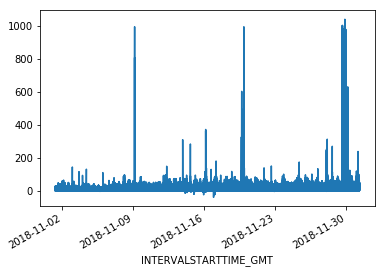

In [20]:
import matplotlib as plt
df1['VALUE'].plot()
plt.show()

In [39]:
# df1.loc['2018-11-02':'2018-11-04', df1['VALUE']].plot()
df1.loc[:'2018-11-07',df1['VALUE']].PLOT()  # puzzling. Interval is secribed below as Categorical 
# but above from df.info() is is shown as a DateTime object!!
plt.show()
        

KeyError: 'None of [INTERVALSTARTTIME_GMT\n2018-11-01 07:00:00     0.00000\n2018-11-01 07:05:00     0.00000\n2018-11-01 07:10:00     0.00000\n2018-11-01 07:15:00     0.00000\n2018-11-01 07:20:00     0.00000\n2018-11-01 07:25:00     0.00000\n2018-11-01 07:30:00     0.00000\n2018-11-01 07:35:00     0.00000\n2018-11-01 07:40:00     0.00000\n2018-11-01 07:45:00     0.00000\n2018-11-01 07:50:00     0.00000\n2018-11-01 07:55:00     0.00000\n2018-11-01 08:00:00     0.00000\n2018-11-01 08:05:00     0.00000\n2018-11-01 08:10:00     0.00000\n2018-11-01 08:15:00     0.00000\n2018-11-01 08:20:00     0.00000\n2018-11-01 08:25:00     0.00000\n2018-11-01 08:30:00     0.00000\n2018-11-01 08:35:00     0.00000\n2018-11-01 08:40:00     0.00000\n2018-11-01 08:45:00     0.00000\n2018-11-01 08:50:00     0.00000\n2018-11-01 08:55:00     0.00000\n2018-11-01 09:00:00     0.00000\n2018-11-01 09:05:00     0.00000\n2018-11-01 09:10:00     0.00000\n2018-11-01 09:15:00     0.00000\n2018-11-01 09:20:00     0.00000\n2018-11-01 09:25:00     0.00000\n                         ...   \n2018-12-01 05:30:00    53.56405\n2018-12-01 05:35:00    53.56405\n2018-12-01 05:40:00    53.72261\n2018-12-01 05:45:00    55.85966\n2018-12-01 05:50:00    55.85966\n2018-12-01 05:55:00    66.40234\n2018-12-01 06:00:00    79.59268\n2018-12-01 06:05:00    71.82458\n2018-12-01 06:10:00    75.98545\n2018-12-01 06:15:00    99.03883\n2018-12-01 06:20:00    81.66713\n2018-12-01 06:25:00    72.85385\n2018-12-01 06:30:00    71.61322\n2018-12-01 06:35:00    69.85675\n2018-12-01 06:40:00    67.05823\n2018-12-01 06:45:00    65.20398\n2018-12-01 06:50:00    64.51432\n2018-12-01 06:55:00    65.25790\n2018-12-01 07:00:00    70.63351\n2018-12-01 07:05:00    73.65837\n2018-12-01 07:10:00    70.21321\n2018-12-01 07:15:00    66.14589\n2018-12-01 07:20:00    63.06999\n2018-12-01 07:25:00    60.21543\n2018-12-01 07:30:00    56.01672\n2018-12-01 07:35:00    52.31761\n2018-12-01 07:40:00    51.70756\n2018-12-01 07:45:00    48.82903\n2018-12-01 07:50:00    48.07948\n2018-12-01 07:55:00    46.81658\nName: VALUE, Length: 43250, dtype: float64] are in the [columns]'

In [21]:
prices= df1[df1.XML_DATA_ITEM == 'LMP_PRC'] # So this drops the 4 unwanted price components and reduces the size by 80%

In [22]:
prices.head()

,OPR_HR,XML_DATA_ITEM,VALUE,OPR_INTERVAL
INTERVALSTARTTIME_GMT,,,,
2018-11-01 07:00:00,1,LMP_PRC,22.75191,1
2018-11-01 07:05:00,1,LMP_PRC,28.40657,2
2018-11-01 07:10:00,1,LMP_PRC,27.41963,3
2018-11-01 07:15:00,1,LMP_PRC,24.94560,4
2018-11-01 07:20:00,1,LMP_PRC,24.82309,5


AttributeError: module 'matplotlib' has no attribute 'show'

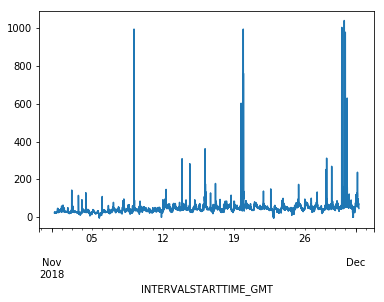

In [23]:
prices.VALUE.plot()
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

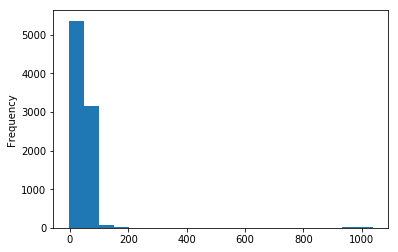

In [24]:
prices.VALUE.plot(kind='hist', bins=20)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

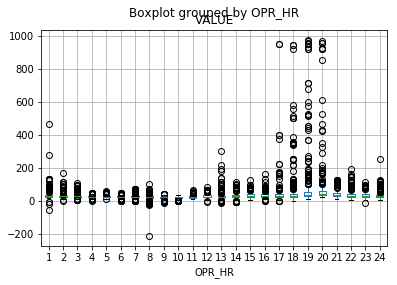

In [48]:
prices.boxplot(column= 'VALUE', by= 'OPR_HR')
plt.show()

In [49]:
prices.columns
prices.shape

(8928, 4)

In [42]:
very_low_prices= prices[prices.VALUE < 30]  # Threshold price increased to $30/MWh, now have 1630 prices so > 720 for 2 hours
very_low_prices.shape

(1630, 4)

In [44]:
low_prices= prices[(prices.VALUE < 30) & (prices.VALUE > -110)] # at $20 was (217,4) before -110 stipulation
low_prices.shape                                                # Puzzling since one observation was -200 !?

(1630, 4)

In [46]:
low_prices.min()

OPR_HR                 1
XML_DATA_ITEM    LMP_PRC
VALUE           -4.78261
OPR_INTERVAL           1
dtype: object

AttributeError: module 'matplotlib' has no attribute 'show'

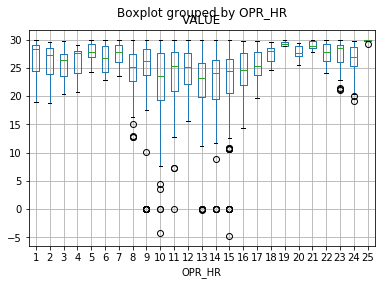

In [47]:
low_prices.boxplot(column= 'VALUE', by= 'OPR_HR')
plt.show()

In [48]:
low_prices.groupby('OPR_HR').count()

# This seems to be saying that the three hours in November with the most frequent low prices are from 10am to 3pm
# But these 172 five-minute intervals average only 29 minutes a day of prices below $20/MWh
# Level 1 charger is normally 2 hours of charging: MAY NEED TO INCREASE THRESHOLD TO 3 CENTS/$30/MWh
# BIG QUESTION IS WHETHER THE DIFFERENCE FOR PEAK EVENING PRICES EXCEEDS 25 CENTS/KWH, OF $45/MWh (see p.17 of "Charging Smart")
# Counts can be compared to 30 days x 12 Intervals = 360 Intervals/month

,XML_DATA_ITEM,VALUE,OPR_INTERVAL
OPR_HR,,,
1,76,76,76
2,61,61,61
3,78,78,78
4,72,72,72
5,62,62,62
6,52,52,52
7,47,47,47
8,55,55,55
9,96,96,96


In [52]:
low_prices.groupby('OPR_HR').mean()
# The lowest average prices are from 9am to 4pm, which is when Solar is strongest.

,VALUE,OPR_INTERVAL
OPR_HR,,
1,26.688654,6.842105
2,25.764593,7.360656
3,25.754234,6.807692
4,26.420639,6.500000
5,27.772707,5.645161
6,26.731433,5.173077
7,27.453656,5.829787
8,24.364289,8.545455
9,23.395015,7.760417


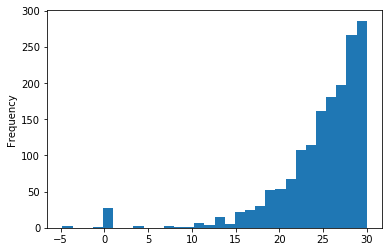

In [51]:
low_prices.VALUE.plot(kind='hist', bins=30)  # No showfliers= False !!

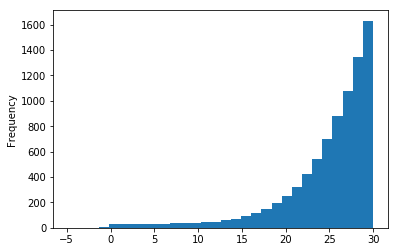

In [50]:
low_prices.VALUE.plot(kind='hist', bins=30, cumulative= True)
# Two hours per day average for a Level One EV charger is 24 intervals x 30 days = 720: THRESHOLD must be increased!!!
# Add a horizontal red line at 720 !!
# Define a function that computes the average price (eg still below 2 cents?)

In [ ]:
# BIG QUESTION: EACH DAY FIND THE HIGHEST 100 PRICES AND THEN THE LOWEST 100 PRICES VIA SORT. 
# THEN SUBTRACT THE LOWEST FROM THE HIGHEST, AND SEE IF > $0.25. KEEP GOING UNTIL THIS THRESHOLD IS HIT! 
# SO CHARGE AT WORK FROM 9 TO 10AM AND USE AT HOME TO RUN AC IN PEAK HOURS!!!